In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import datetime as dt
import warnings
warnings.filterwarnings('ignore') 

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#loading the data

df = pd.read_excel("cisco.xlsx", sheet_name="Sheet2", skiprows=1, index_col=None)

In [3]:
df.head()

,Unnamed: 0,Unnamed: 1,Qtr Ending,Qtr Ending.1,Qtr Ending.2,Qtr Ending.3,Qtr Ending.4,Qtr Ending.5,Qtr Ending.6,Qtr Ending.7,...,Qtr Ending.16,Qtr Ending.17,Qtr Ending.18,Qtr Ending.19,Qtr Ending.20,Qtr Ending.21,Qtr Ending.22,Qtr Ending.23,Qtr Ending.24,Qtr Ending.25
0,NaN,NaN,2009-10-24 00:00:00,2010-01-23 00:00:00,2010-05-01 00:00:00,2010-07-31 00:00:00,2010-10-30 00:00:00,2011-01-29 00:00:00,2011-04-30 00:00:00,2011-07-30 00:00:00,...,2013-10-26 00:00:00,2014-01-25 00:00:00,2014-04-26 00:00:00,2014-07-26 00:00:00,2014-10-25 00:00:00,2015-01-24 00:00:00,2015-04-25 00:00:00,2015-07-25 00:00:00,2015-10-24 00:00:00,2016-01-23 00:00:00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NET SALES:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Product,7200,7976,8436,8808,8700,8236,8669,8921,...,9397,8423,8820,9532,9435,9078,9326,9911,9844,8983
4,NaN,Service,1821,1839,1932,2028,2050,2171,2197,2274,...,2688,2732,2725,2825,2810,2858,2811,2932,2838,2944


In [4]:
df.dropna(how="all",inplace=True)
df['Unnamed: 0'] = df['Unnamed: 0'].fillna(method='ffill')
df['Unnamed: 1'] = df['Unnamed: 1'].fillna(df['Unnamed: 0']) 
df = df.T[1:]
df.rename(columns = {'Unnamed: 1':'Qtr'}, inplace=True)
df.columns = df.iloc[0]
df = df.drop(['NET SALES:', 'COST OF SALES:', 'OPERATING EXPENSES:'], axis=1)
df = df.reset_index(level = 0, drop=True)
df = df.drop(df.index[0])
columns = ['Qtr','NETSales_Product','NETSales_Service','Total_NETSales','COSTSales_Product','COSTSales_Service',
           'Total_COSTSales','GROSS_MARGIN','OPEX_R_D','OPEX_Sales_Marketing','OPEX_General_Administrative','OPEX_Intag_Assets','OPEX_Restruct_OtherCharges',
           'Total_OPEX','OPIN','Interest_Income','Interest_Expense','Other_Income','NetInterest_OtherIncome',
           'INCOME_BeforeTax', 'PROVISION_for_Income_Taxes','NET_INCOME']
df.columns = columns
df.head()
df.shape

,Qtr,NETSales_Product,NETSales_Service,Total_NETSales,COSTSales_Product,COSTSales_Service,Total_COSTSales,GROSS_MARGIN,OPEX_R_D,OPEX_Sales_Marketing,...,OPEX_Restruct_OtherCharges,Total_OPEX,OPIN,Interest_Income,Interest_Expense,Other_Income,NetInterest_OtherIncome,INCOME_BeforeTax,PROVISION_for_Income_Taxes,NET_INCOME
1,2009-10-24 00:00:00,7200,1821,9021,2486,647,3133,5888,1224,2010,...,NaN,3764,2124,168,-114,61,115,2239,452,1787
2,2010-01-23 00:00:00,7976,1839,9815,2815,668,3483,6332,1247,2126,...,NaN,3962,2370,155,-158,-12,-15,2355,502,1853
3,2010-05-01 00:00:00,8436,1932,10368,3010,728,3738,6630,1411,2278,...,NaN,4285,2345,158,-182,82,58,2403,211,2192
4,2010-07-31 00:00:00,8808,2028,10836,3309,734,4043,6793,1391,2368,...,NaN,4468,2325,154,-169,108,93,2418,483,1935
5,2010-10-30 00:00:00,8700,2050,10750,3249,746,3995,6755,1431,2402,...,NaN,4404,2351,160,-166,80,74,2425,495,1930


(26, 22)

In [5]:
#df['Qtr'] = df['Qtr'].map(dt.datetime.toordinal)
df['Qtr'] = df.index.values
df = df.convert_objects(convert_numeric=True)
df.head()
df.tail()
df.columns


,Qtr,NETSales_Product,NETSales_Service,Total_NETSales,COSTSales_Product,COSTSales_Service,Total_COSTSales,GROSS_MARGIN,OPEX_R_D,OPEX_Sales_Marketing,...,OPEX_Restruct_OtherCharges,Total_OPEX,OPIN,Interest_Income,Interest_Expense,Other_Income,NetInterest_OtherIncome,INCOME_BeforeTax,PROVISION_for_Income_Taxes,NET_INCOME
1,1,7200,1821,9021,2486,647,3133,5888,1224,2010,...,NaN,3764,2124,168,-114,61,115,2239,452,1787
2,2,7976,1839,9815,2815,668,3483,6332,1247,2126,...,NaN,3962,2370,155,-158,-12,-15,2355,502,1853
3,3,8436,1932,10368,3010,728,3738,6630,1411,2278,...,NaN,4285,2345,158,-182,82,58,2403,211,2192
4,4,8808,2028,10836,3309,734,4043,6793,1391,2368,...,NaN,4468,2325,154,-169,108,93,2418,483,1935
5,5,8700,2050,10750,3249,746,3995,6755,1431,2402,...,NaN,4404,2351,160,-166,80,74,2425,495,1930


,Qtr,NETSales_Product,NETSales_Service,Total_NETSales,COSTSales_Product,COSTSales_Service,Total_COSTSales,GROSS_MARGIN,OPEX_R_D,OPEX_Sales_Marketing,...,OPEX_Restruct_OtherCharges,Total_OPEX,OPIN,Interest_Income,Interest_Expense,Other_Income,NetInterest_OtherIncome,INCOME_BeforeTax,PROVISION_for_Income_Taxes,NET_INCOME
22,22,9078,2858,11936,3806,1040,4846,7090,1529,2308,...,69.0,4468,2622,189,-139,201,251,2873,476,2397
23,23,9326,2811,12137,3584,1028,4612,7525,1547,2449,...,24.0,4600,2925,190,-139,59,110,3035,598,2437
24,24,9911,2932,12843,4068,1042,5110,7733,1548,2549,...,73.0,4852,2881,211,-149,-10,52,2933,614,2319
25,25,9844,2838,12682,3853,997,4850,7832,1560,2443,...,142.0,4753,3079,225,-159,-8,58,3137,707,2430
26,26,8983,2944,11927,3480,1015,4495,7432,1509,2286,...,96.0,4138,3294,237,-162,-63,12,3306,159,3147


Index(['Qtr', 'NETSales_Product', 'NETSales_Service', 'Total_NETSales',
       'COSTSales_Product', 'COSTSales_Service', 'Total_COSTSales',
       'GROSS_MARGIN', 'OPEX_R_D', 'OPEX_Sales_Marketing',
       'OPEX_General_Administrative', 'OPEX_Intag_Assets',
       'OPEX_Restruct_OtherCharges', 'Total_OPEX', 'OPIN', 'Interest_Income',
       'Interest_Expense', 'Other_Income', 'NetInterest_OtherIncome',
       'INCOME_BeforeTax', 'PROVISION_for_Income_Taxes', 'NET_INCOME'],
      dtype='object')

In [6]:
df.describe()

,Qtr,NETSales_Product,NETSales_Service,Total_NETSales,COSTSales_Product,COSTSales_Service,Total_COSTSales,GROSS_MARGIN,OPEX_R_D,OPEX_Sales_Marketing,...,OPEX_Restruct_OtherCharges,Total_OPEX,OPIN,Interest_Income,Interest_Expense,Other_Income,NetInterest_OtherIncome,INCOME_BeforeTax,PROVISION_for_Income_Taxes,NET_INCOME
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,...,19.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,13.500000,9001.923077,2491.846154,11493.769231,3602.461538,870.461538,4472.923077,7020.846154,1465.230769,2378.153846,...,123.578947,4536.730769,2484.115385,173.153846,-149.269231,29.884615,53.769231,2537.884615,434.346154,2103.538462
std,7.648529,608.813595,352.015192,908.767443,403.240695,118.231038,497.377677,507.631338,110.192307,116.647741,...,176.836810,327.498343,436.571948,21.454496,12.941585,54.838182,56.807258,438.761742,213.060356,439.284803
min,1.000000,7200.000000,1821.000000,9021.000000,2486.000000,647.000000,3133.000000,5888.000000,1224.000000,2010.000000,...,3.000000,3764.000000,1456.000000,154.000000,-182.000000,-63.000000,-20.000000,1467.000000,-363.000000,1232.000000
25%,7.250000,8727.000000,2216.250000,10938.250000,3447.750000,765.500000,4238.750000,6764.500000,1411.250000,2346.500000,...,28.500000,4407.750000,2329.250000,160.250000,-156.750000,-9.500000,15.000000,2356.250000,410.000000,1834.250000
50%,13.500000,9092.000000,2618.000000,11639.000000,3622.500000,885.000000,4572.000000,7087.500000,1465.000000,2398.500000,...,73.000000,4543.500000,2498.500000,165.500000,-148.000000,19.000000,49.000000,2585.500000,479.500000,2128.500000
75%,19.750000,9425.500000,2790.500000,12127.250000,3841.250000,968.000000,4823.250000,7390.500000,1545.750000,2445.500000,...,119.000000,4705.500000,2779.250000,177.000000,-142.250000,58.250000,87.250000,2848.250000,542.750000,2306.750000
max,26.000000,9911.000000,2944.000000,12843.000000,4323.000000,1042.000000,5204.000000,7832.000000,1724.000000,2549.000000,...,768.000000,5405.000000,3294.000000,237.000000,-114.000000,201.000000,251.000000,3306.000000,707.000000,3147.000000


# Missing value treatment
We have few missing value in OPEX_Restruct_OtherCharges. But this may be because re-structuring started only after Qtr Ending 4/30/2011. So we will impute 0 for these missing values

In [7]:
df.OPEX_Restruct_OtherCharges = df.OPEX_Restruct_OtherCharges.fillna(0)

In [8]:
eda_report = pandas_profiling.ProfileReport(df)
eda_report.to_file('Cisco.html')

# Splitting the data into 3 sub data sets

Dataset 1 - Individual Items (Without Totals)

In [9]:
df_items = df.loc[:,('Qtr','NETSales_Product', 'NETSales_Service', 'COSTSales_Product', 'COSTSales_Service', 
                     'OPEX_R_D', 'OPEX_Sales_Marketing', 'OPEX_General_Administrative', 'OPEX_Intag_Assets', 'OPEX_Restruct_OtherCharges',
                    'Interest_Income','Interest_Expense','Other_Income','PROVISION_for_Income_Taxes','NET_INCOME')]
df_items.head()
df_items.shape

,Qtr,NETSales_Product,NETSales_Service,COSTSales_Product,COSTSales_Service,OPEX_R_D,OPEX_Sales_Marketing,OPEX_General_Administrative,OPEX_Intag_Assets,OPEX_Restruct_OtherCharges,Interest_Income,Interest_Expense,Other_Income,PROVISION_for_Income_Taxes,NET_INCOME
1,1,7200,1821,2486,647,1224,2010,425,105,0.0,168,-114,61,452,1787
2,2,7976,1839,2815,668,1247,2126,451,138,0.0,155,-158,-12,502,1853
3,3,8436,1932,3010,728,1411,2278,479,117,0.0,158,-182,82,211,2192
4,4,8808,2028,3309,734,1391,2368,578,131,0.0,154,-169,108,483,1935
5,5,8700,2050,3249,746,1431,2402,458,113,0.0,160,-166,80,495,1930


(26, 15)

Dataset 2 - Item Sub Totals

In [10]:
df_item_totals = df.loc[:,('Qtr','Total_NETSales', 'Total_COSTSales', 'GROSS_MARGIN','Total_OPEX', 'OPIN', 'NetInterest_OtherIncome','INCOME_BeforeTax','PROVISION_for_Income_Taxes', 'NET_INCOME')]
df_item_totals.head()
df_item_totals.shape

,Qtr,Total_NETSales,Total_COSTSales,GROSS_MARGIN,Total_OPEX,OPIN,NetInterest_OtherIncome,INCOME_BeforeTax,PROVISION_for_Income_Taxes,NET_INCOME
1,1,9021,3133,5888,3764,2124,115,2239,452,1787
2,2,9815,3483,6332,3962,2370,-15,2355,502,1853
3,3,10368,3738,6630,4285,2345,58,2403,211,2192
4,4,10836,4043,6793,4468,2325,93,2418,483,1935
5,5,10750,3995,6755,4404,2351,74,2425,495,1930


(26, 10)

Dataset 3 - Net Income

In [11]:
df_NetIncome = pd.DataFrame(df,columns=['Qtr','NET_INCOME'])
df_NetIncome.head()
df_NetIncome.shape

,Qtr,NET_INCOME
1,1,1787
2,2,1853
3,3,2192
4,4,1935
5,5,1930


(26, 2)

Visualizing Net Income Trend

<Figure size 720x432 with 0 Axes>

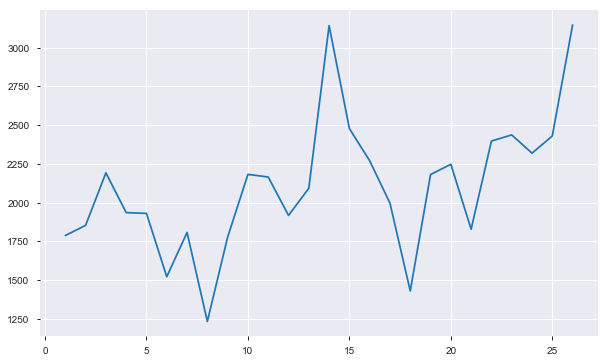

In [12]:
#plot
plt.figure(figsize=(10,6))
plt.plot(df_NetIncome['NET_INCOME'], label='NET_INCOME')

In [13]:
#implement linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [14]:
df_NetIncome.head()

,Qtr,NET_INCOME
1,1,1787
2,2,1853
3,3,2192
4,4,1935
5,5,1930


In [15]:
X = df_NetIncome.iloc[:, :-1].values
Y = df_NetIncome.iloc[:, 1].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,  random_state=None, shuffle=False)

In [17]:
slr = LinearRegression()
slr.fit(X_train,y_train)

#make predictions and find the rmse

y_pred = slr.predict(X_test)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE Value :", rmse)
print("R-Squared Value :", r2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

RMSE Value : 326.3604253416652
R-Squared Value : 0.11210899720631062


In [18]:
y_pred

array([2196.54901961, 2218.95768834, 2241.36635707, 2263.7750258 ,
       2286.18369453, 2308.59236326, 2331.00103199, 2353.40970072])

In [19]:
y_test

array([2181, 2247, 1828, 2397, 2437, 2319, 2430, 3147], dtype=int64)

In [20]:
df_NetIncome_y = pd.DataFrame(y_test, columns=['NET INCOME'])
df_NetIncome_y['Predictions'] = y_pred 

In [21]:
df_NetIncome_y

,NET INCOME,Predictions
0,2181,2196.549020
1,2247,2218.957688
2,1828,2241.366357
3,2397,2263.775026
4,2437,2286.183695
5,2319,2308.592363
6,2430,2331.001032
7,3147,2353.409701


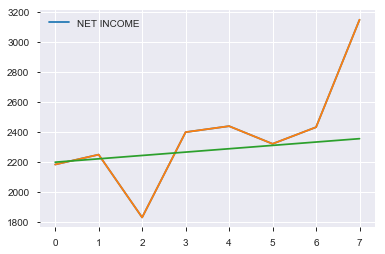

In [22]:
#plot
#y_test['Predictions'] = 0
#y_test['Predictions'] = y_pred

plt.plot(df_NetIncome_y['NET INCOME'])
plt.plot(df_NetIncome_y[['NET INCOME', 'Predictions']])
plt.legend()

Simple Linear Regression on individual Cash flow items

In [23]:
# Importing Necessary Libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [24]:
# Function to impute Outliers with Mean

def outliers(Y_OL):
    final_list=[]
    elements = np.array(Y_OL)
    mean = np.mean(elements, axis=0)
    sd = np.std(elements, axis=0)

    for a in Y_OL:
        if ((a > mean - 2 * sd) and (a < mean + 2 * sd)):
            final_list.append(a)
        else:
            final_list.append(mean)

    return final_list


# Function to find the Coefficients

def coeff(X,Y):

    # Total number of values
    m = len(X)

    # Using the formula to calculate b1 and b2
    numer = 0
    denom = 0
    for i in range(m):
        numer += (X[i] - mean_x) * (Y[i] - mean_y)
        denom += (X[i] - mean_x) ** 2
    b1 = numer / denom
    b0 = mean_y - (b1 * mean_x)

    return[b0, b1]

# Calculating Root Mean Squares Error
def rms(X,Y,m):
    rmse = 0
    for i in range(m):
        y_pred = b0 + b1 * X[i]
        rmse += (Y[i] - y_pred) ** 2
    rmse = np.sqrt(rmse/m)
    #print(rmse)
    return rmse    

# Calculating the Root Square
def r_square(X,Y):
    ss_t = 0
    ss_r = 0
    for i in range(m):
        y_pred = b0 + b1 * X[i]
        ss_t += (Y[i] - mean_y) ** 2
        ss_r += (Y[i] - y_pred) ** 2
        
    r2 = 1 - (ss_r/ss_t)
    
    return r2

def ypred(X,Y):
    ypredicted = []
    for i in range(m):
        y_pred = b0 + b1 * X[i]
        ypredicted.append(y_pred)
    return ypredicted

In [25]:
df2 = pd.DataFrame()
df_ypredicted = pd.DataFrame()
lst_rmse = []
lst_r2=[]
lst_coeff = []
lst_ypred27 = []
lst_ypred28 = []
Y=[]

for column in df_items:
    X = df_items['Qtr'].values
    Y_OL = df_items[column].values
    m = len(X)
    df2['Items'] = df_items.columns
    Y = outliers(Y_OL)
    # Mean X and Y
    mean_x = np.mean(X)
    mean_y = np.mean(Y)
    b0, b1 = coeff(X,Y)
    lst_coeff.append([b0, b1])
    lst_rmse.append(rms(X,Y,m))
    lst_r2.append(r_square(X,Y))
    lst_ypred27.append(coeff(X,Y)[0] + coeff(X,Y)[1] * 27) 
    lst_ypred28.append(coeff(X,Y)[0] + coeff(X,Y)[1] * 28) 
df2['Coefficients'] = lst_coeff
df2['RMSE'] = lst_rmse
df2['R_Square'] = lst_r2
df2['Qtr_27_Predicted'] = lst_ypred27
df2['Qtr_28_Predicted'] = lst_ypred28
df_ypredicted['Qtr'] = df['Qtr']
df_ypredicted['Predicted'] = ypred(X,Y)
df2.index = df2['Items']
df2 = df2.drop('Items', axis=1)
df2 = df2.drop(df2.index[0])
df2

,Coefficients,RMSE,R_Square,Qtr_27_Predicted,Qtr_28_Predicted
Items,,,,,
NETSales_Product,"[8519.523550295859, 40.86698224852071]",364.375390,0.414373,9622.932071,9663.799053
NETSales_Service,"[1889.04, 44.652307692307694]",83.641424,0.941284,3094.652308,3139.304615
COSTSales_Product,"[3259.0740828402368, 28.616909927679153]",245.964881,0.432275,4031.730651,4060.347561
COSTSales_Service,"[666.8215384615385, 15.084444444444447]",25.333569,0.952251,1074.101538,1089.185983
OPEX_R_D,"[1390.9041420118344, 6.077449046679814]",53.784833,0.417996,1554.995266,1561.072715
OPEX_Sales_Marketing,"[2390.2674556213015, 0.8699539776462848]",69.377015,0.008767,2413.756213,2414.626167
OPEX_General_Administrative,"[488.60710059171606, 1.5217619986850752]",43.328266,0.064884,529.694675,531.216437
OPEX_Intag_Assets,"[120.03136094674555, -1.8867192636423404]",19.105678,0.354232,69.089941,67.203222
OPEX_Restruct_OtherCharges,"[0.7966863905325283, 4.699697567389876]",71.190453,0.196879,127.688521,132.388218


Calculations for Net Income for the Qtr 27

In [26]:
NET_SALES = df2.Qtr_27_Predicted[0] + df2.Qtr_27_Predicted[1]

COST_OF_SALES = df2.Qtr_27_Predicted[2] + df2.Qtr_27_Predicted[3]

OPEX = df2.Qtr_27_Predicted[4] + df2.Qtr_27_Predicted[5] + df2.Qtr_27_Predicted[6] + df2.Qtr_27_Predicted[7] + df2.Qtr_27_Predicted[8] 

NET_INEREST_INCOME = df2.Qtr_27_Predicted[9] + df2.Qtr_27_Predicted[10] + df2.Qtr_27_Predicted[11]

PROVISION_for_Income_Taxes = df2.Qtr_27_Predicted[12]

NET_INCOME1 = NET_SALES - COST_OF_SALES - OPEX + NET_INEREST_INCOME - PROVISION_for_Income_Taxes

print("Net Income for Qtr 27 is :", NET_INCOME1)

Net Income for Qtr 27 is : 2421.5200000000013


Calculations for Net Income for the Qtr 28

In [27]:
NET_SALES = df2.Qtr_28_Predicted[0] + df2.Qtr_28_Predicted[1]

COST_OF_SALES = df2.Qtr_28_Predicted[2] + df2.Qtr_28_Predicted[3]

OPEX = df2.Qtr_28_Predicted[4] + df2.Qtr_28_Predicted[5] + df2.Qtr_28_Predicted[6] + df2.Qtr_28_Predicted[7] + df2.Qtr_28_Predicted[8] 

NET_INEREST_INCOME = df2.Qtr_28_Predicted[9] + df2.Qtr_28_Predicted[10] + df2.Qtr_28_Predicted[11]

PROVISION_for_Income_Taxes = df2.Qtr_28_Predicted[12]

NET_INCOME2 = NET_SALES - COST_OF_SALES - OPEX + NET_INEREST_INCOME - PROVISION_for_Income_Taxes

print("Net Income for Qtr 28 is :", NET_INCOME2)

Net Income for Qtr 28 is : 2446.6754372123632


Text(0.5, 0, 'Qtr')

Text(0, 0.5, 'Net Income')

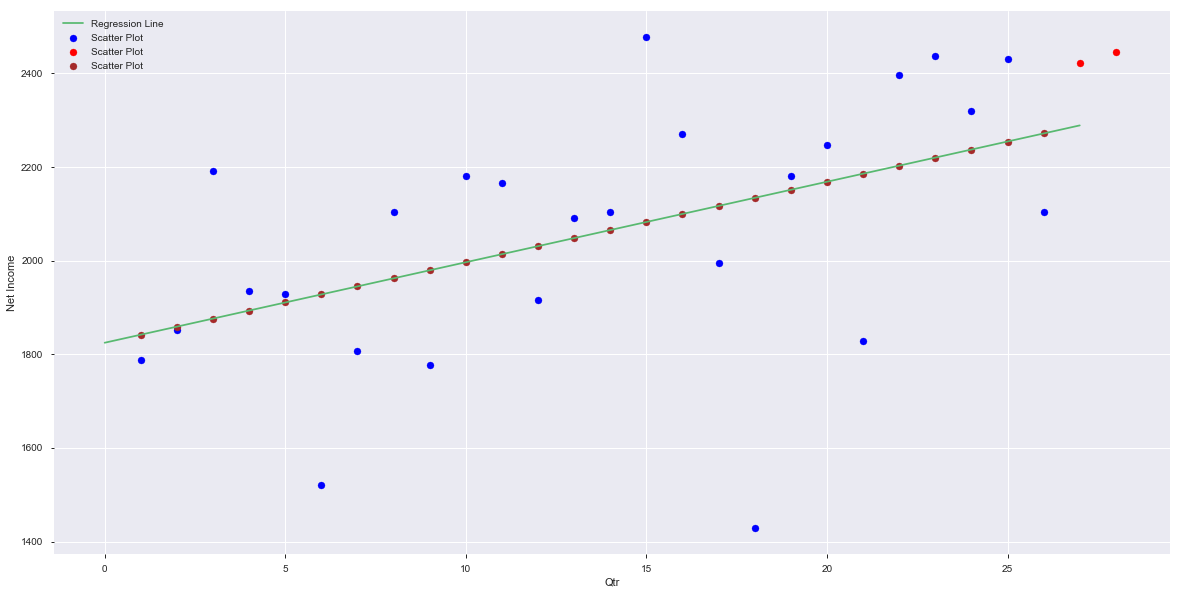

In [28]:
# Plotting Values and Regression Line
Qtr_pred = [27,28]
predicted = [NET_INCOME1, NET_INCOME2]
X = df['Qtr']
max_x = np.max(X) + 1
min_x = np.min(X) - 1
# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x
# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='blue', label='Scatter Plot')
plt.scatter(Qtr_pred, predicted, c='red', label='Scatter Plot')
plt.scatter(df_ypredicted['Qtr'], df_ypredicted['Predicted'], c='brown', label='Scatter Plot')

plt.xlabel('Qtr')
plt.ylabel('Net Income')
plt.legend()
plt.show()

Predicting Net Income using the individual Cash flow items

In [29]:
X =  df_items.iloc[:,1:14]
Y =  df_items.iloc[:,14:]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,  random_state=None, shuffle=False)

In [31]:
slr = LinearRegression()
slr.fit(X_train,y_train)

#make predictions and find the rmse

y_pred = slr.predict(X_test)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE Value :", rmse)
print("R-Squared Value :", r2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

RMSE Value : 2.3243328883223594e-12
R-Squared Value : 1.0


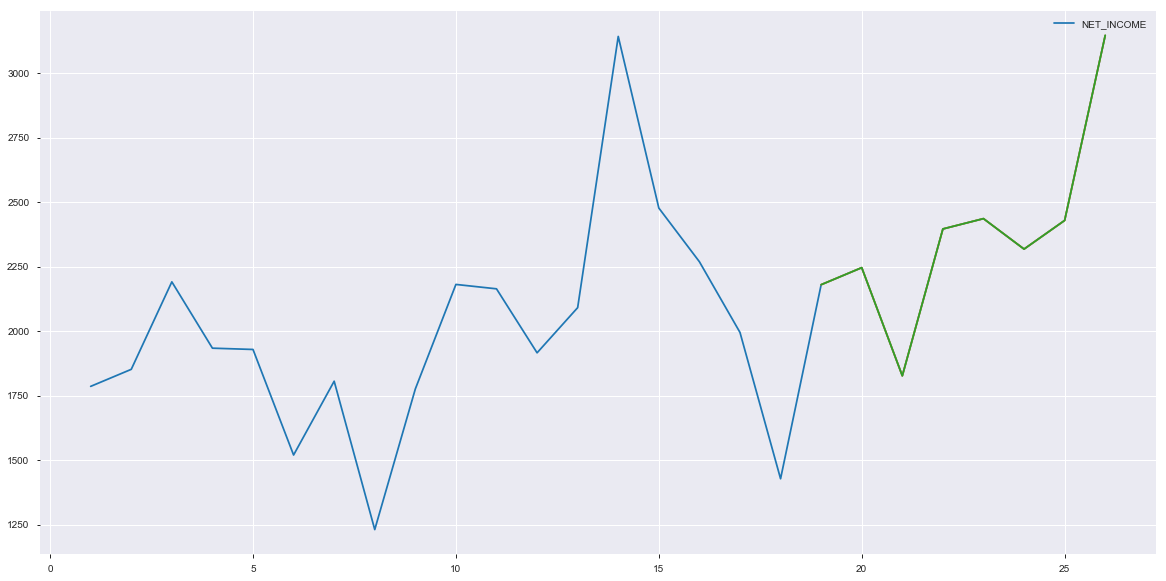

In [32]:
#plot
y_test['Predictions'] = 0
y_test['Predictions'] = y_pred

plt.plot(df_items['NET_INCOME'])
plt.plot(y_test[['NET_INCOME', 'Predictions']])
plt.legend()

Simple Linear Regression on individual Sub Totals and Calculating the Net Income

In [33]:
df2 = pd.DataFrame()
lst_rmse = []
lst_r2=[]
lst_coeff = []
lst_ypred27 = []
lst_ypred28 = []
Y=[]
for column in df_item_totals:
    X = df_item_totals['Qtr'].values
    Y_OL = df_item_totals[column].values
    m = len(X)
    df2['Items'] = df_item_totals.columns
    Y = outliers(Y_OL)
    # Mean X and Y
    mean_x = np.mean(X)
    mean_y = np.mean(Y)
    b0, b1 = coeff(X,Y)
    lst_coeff.append([b0, b1])
    lst_rmse.append(rms(X,Y,m))
    lst_r2.append(r_square(X,Y))
    lst_ypred27.append(coeff(X,Y)[0] + coeff(X,Y)[1] * 27) 
    lst_ypred28.append(coeff(X,Y)[0] + coeff(X,Y)[1] * 28) 
df2['Coefficients'] = lst_coeff
df2['RMSE'] = lst_rmse
df2['R_Square'] = lst_r2
df2['Qtr_27_Predicted'] = lst_ypred27
df2['Qtr_28_Predicted'] = lst_ypred28

df2.index = df2['Items']
df2 = df2.drop('Items', axis=1)
df2 = df2.drop(df2.index[0])
df2

,Coefficients,RMSE,R_Square,Qtr_27_Predicted,Qtr_28_Predicted
Items,,,,,
Total_NETSales,"[10511.770650887574, 79.78556213017751]",437.949932,0.651192,12665.980828,12745.766391
Total_COSTSales,"[4103.432426035503, 34.007416173570014]",240.920383,0.528477,5021.632663,5055.640079
GROSS_MARGIN,"[6548.204497041421, 41.28596975673898]",226.583438,0.651270,7662.925680,7704.211650
Total_OPEX,"[4379.614556213018, 11.366048652202496]",209.494600,0.142055,4686.497870,4697.863918
OPIN,"[2130.7426035502954, 29.104865220249835]",305.609540,0.337825,2916.573964,2945.678830
NetInterest_OtherIncome,"[38.80307692307692, 0.5466929651545037]",39.146364,0.010851,53.563787,54.110480
INCOME_BeforeTax,"[2165.472781065089, 30.6370151216305]",294.118879,0.379012,2992.672189,3023.309204
PROVISION_for_Income_Taxes,"[394.9224852071006, 5.191913214990137]",129.381897,0.083056,535.104142,540.296055
NET_INCOME,"[1824.8340828402368, 17.19353057199211]",232.596202,0.235100,2289.059408,2306.252939


Calculations for Net Income for the Qtr 27

In [34]:
NET_INCOME1 = df2.Qtr_27_Predicted[0] - df2.Qtr_27_Predicted[1] - df2.Qtr_27_Predicted[3] + df2.Qtr_27_Predicted[5] - df2.Qtr_27_Predicted[7]


print("Net Income for Qtr 27 is :", NET_INCOME1)

Net Income for Qtr 27 is : 2476.3099408284024


Calculations for Net Income for the Qtr 28

In [35]:
NET_INCOME2 = df2.Qtr_28_Predicted[0] - df2.Qtr_28_Predicted[1] - df2.Qtr_28_Predicted[3] + df2.Qtr_28_Predicted[5] - df2.Qtr_28_Predicted[7]


print("Net Income for Qtr 28 is :", NET_INCOME2)

Net Income for Qtr 28 is : 2506.076817882971


Text(0.5, 0, 'Qtr')

Text(0, 0.5, 'Net Income')

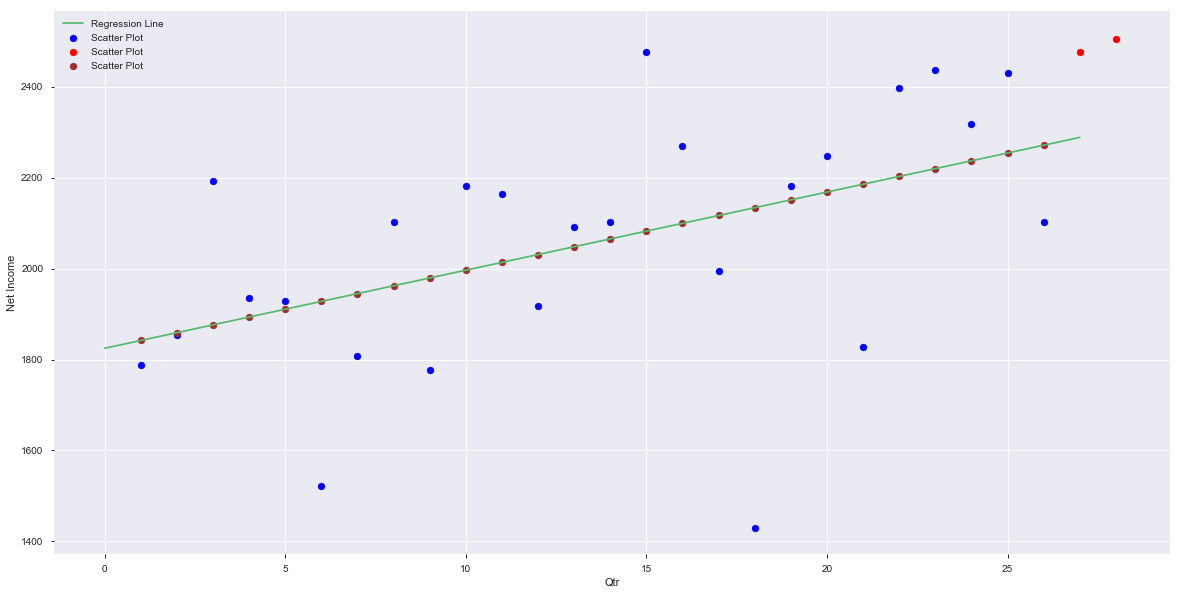

In [36]:
# Plotting Values and Regression Line
Qtr_pred = [27,28]
predicted = [NET_INCOME1, NET_INCOME2]
X = df['Qtr']

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x
# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='blue', label='Scatter Plot')
plt.scatter(Qtr_pred, predicted, c='red', label='Scatter Plot')
plt.scatter(df_ypredicted['Qtr'], df_ypredicted['Predicted'], c='brown', label='Scatter Plot')

plt.xlabel('Qtr')
plt.ylabel('Net Income')
plt.legend()
plt.show()

In [37]:
df_Key = df_item_totals[df_item_totals.columns.difference(['Qtr','Total_OPEX','OPIN', 'GROSS_MARGIN',
                                                           'PROVISION_for_Income_Taxes','NetInterest_OtherIncome'])]
#df_Key = df.loc[:,('Total_COSTSales', 'INCOME_BeforeTax', 'NET_INCOME')]

df_Key.head()
df_Key.shape

,INCOME_BeforeTax,NET_INCOME,Total_COSTSales,Total_NETSales
1,2239,1787,3133,9021
2,2355,1853,3483,9815
3,2403,2192,3738,10368
4,2418,1935,4043,10836
5,2425,1930,3995,10750


(26, 4)

In [38]:
#split into train and validation
train = df_Key[:20]
test = df_Key[20:]


# Split into train and validation
x_train = train.drop('NET_INCOME', axis=1)
y_train = train['NET_INCOME']
x_test = test.drop('NET_INCOME', axis=1)
y_test = test['NET_INCOME']

In [39]:
#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE Value :", rmse)
print("R-Squared Value :", r2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

RMSE Value : 208.19995214242007
R-Squared Value : 0.7077292967080978


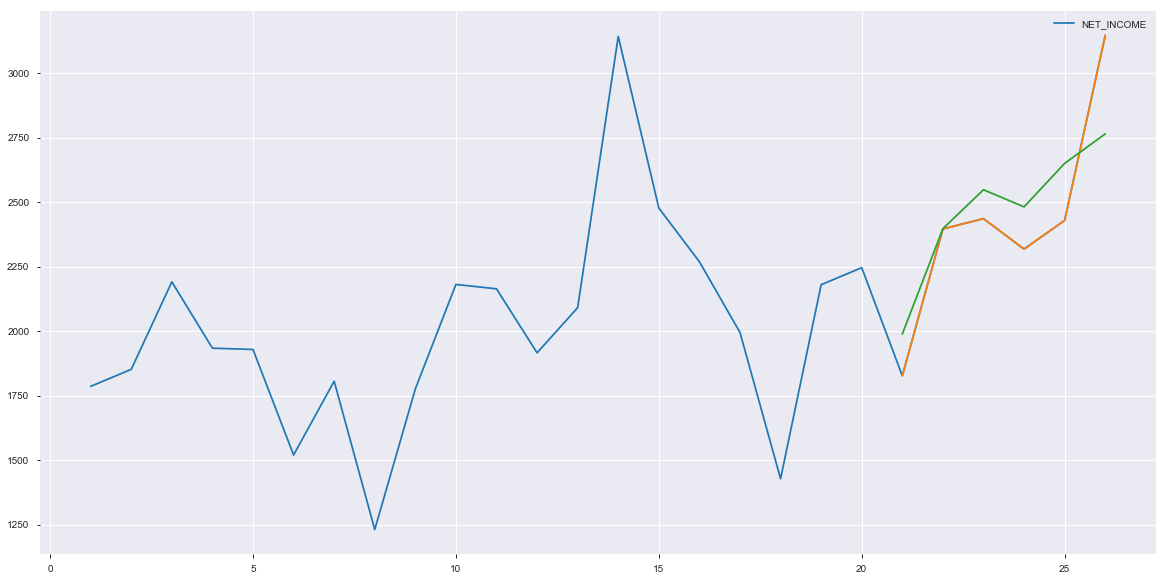

In [40]:
#plot
test['Predictions'] = 0
test['Predictions'] = y_pred

plt.plot(df_items['NET_INCOME'])
plt.plot(test[['NET_INCOME', 'Predictions']])
plt.legend()